In [1]:
from pyportfolio import PyPortfolio
import matplotlib.pyplot as plt

/Users/paopao_ch/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
stock_tickers = [  # Some random tickers to demonstrate the class usage
    "D05.SI",
    "O39.SI",
    "Z74.SI",
    "G07.SI",
    "C07.SI",
    "S58.SI",
    "C09.SI",
    "K71U.SI",
    "HMN.SI",
    "E5H.SI",
    "NS8U.SI",
]
portfolio = PyPortfolio(stock_tickers)

/Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py:132: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 132 of the file /Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.content)
/Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py:135: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_rf = pd.read_html(table_html)[0]
[*********************100%*********

In [3]:
portfolio.info.head(38)

,Ticker,Company,Sector,Market Cap (B SGD),10-Y Return(%)
0,D05.SI,DBS Group Holdings Ltd,Financial Services,110.040932,194.215280
1,O39.SI,Oversea-Chinese Banking Corporation Limited,Financial Services,67.368591,98.344975
2,Z74.SI,Singapore Telecommunications Limited,Communication Services,52.017209,5.344146
3,G07.SI,Great Eastern Holdings Limited,Financial Services,12.211630,23.720415
4,C07.SI,Jardine Cycle & Carriage Limited,Industrials,10.928275,16.059935
5,S58.SI,SATS Ltd.,Industrials,5.426995,12.907555
6,C09.SI,City Developments Limited,Real Estate,4.681426,-18.298127
7,K71U.SI,Keppel REIT,Real Estate,3.621183,32.140214
8,HMN.SI,CapitaLand Ascott Trust,Real Estate,3.601935,50.533086
9,E5H.SI,Golden Agri-Resources Ltd,Consumer Defensive,3.614285,-38.020216


In [4]:
portfolio.data.head()

Ticker,C07.SI,C09.SI,D05.SI,E5H.SI,G07.SI,HMN.SI,K71U.SI,NS8U.SI,O39.SI,S58.SI,Z74.SI
Date,,,,,,,,,,,
2014-01-02 00:00:00+00:00,24.551655,8.031898,9.859756,0.409968,13.679792,0.618760,0.659174,0.187106,6.164503,2.424310,2.344696
2014-01-03 00:00:00+00:00,24.259214,7.888473,9.790565,0.406241,13.533934,0.616203,0.659174,0.187106,6.067614,2.409252,2.306258
2014-01-06 00:00:00+00:00,24.334024,7.880038,9.813625,0.413695,13.587672,0.616203,0.656381,0.184334,5.976781,2.394194,2.267821
2014-01-07 00:00:00+00:00,24.599268,7.846287,9.825159,0.406241,13.556966,0.623874,0.650794,0.184334,5.904116,2.386665,2.267821
2014-01-08 00:00:00+00:00,24.823690,7.998151,10.015437,0.406241,13.541614,0.621317,0.656381,0.188492,5.910171,2.424310,2.274227


In [5]:
results, weights = portfolio.run_monte_carlo_simulation(num_portfolios=100000)

100%|██████████| 100000/100000 [00:03<00:00, 31419.46it/s]


In [6]:
min_vol_weights, min_vol_returns, min_vol_std = portfolio.get_lowest_vol_port()
min_vol_weights

array([ 0.00291936, -0.04302335,  0.01278395,  0.01151056,  0.42452655,
        0.06172255,  0.14594795,  0.00542282,  0.13993141,  0.04407336,
        0.19418483])

In [7]:
optimal_weights, optimal_returns, optimal_std = portfolio.get_optimise_port()
optimal_weights

array([ 0.02975865, -1.70189861,  4.51300458, -0.30935457, -0.96251692,
        0.80403781,  0.28863434, -0.2864767 ,  0.49157614, -0.11605435,
       -1.75071038])

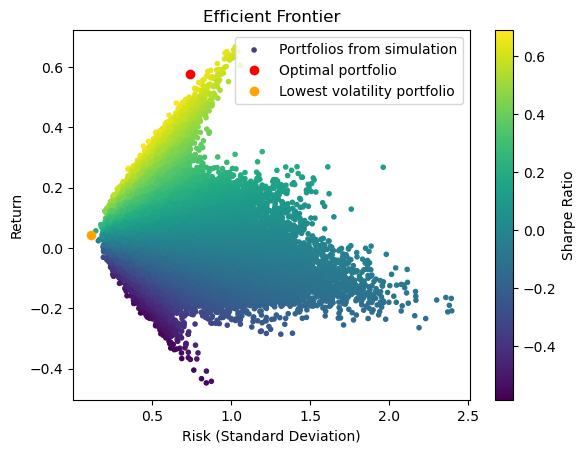

In [8]:
plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='.', label="Portfolios from simulation")
plt.plot(optimal_std, optimal_returns, 'o', markersize=6, color="red", label="Optimal portfolio")
plt.plot(min_vol_std, min_vol_returns, 'o', markersize=6, color="orange", label="Lowest volatility portfolio")
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.legend()
plt.show()